Spectral Analysis

Most signals can be decomposed into a sum of sines and cosines of various wavelengths and amplitudes.

Let us take a sine wave:

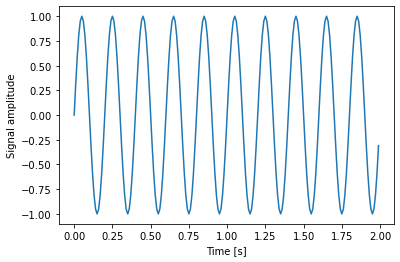

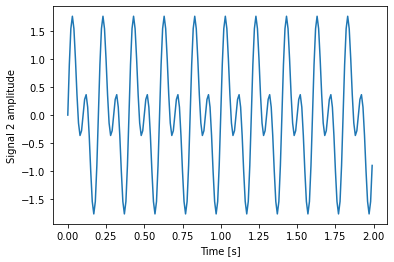

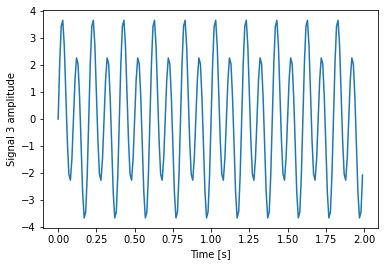

In [14]:
import matplotlib.pyplot as plt
import numpy as np

f = 5  # Frequency, in cycles per second - Hertz
f_s = 100  # Sampling rate, or number of measurements per second
t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

x2 = np.sin(f * 2 * np.pi * t) + np.sin(f * 4 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, x2)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal 2 amplitude');

x3 = np.sin(f * 2 * np.pi * t) + 3*np.sin(f * 4 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, x3)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal 3 amplitude');


<ipython-input-16-250dfecc2192>:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(freqs, np.abs(X))
<ipython-input-16-250dfecc2192>:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(freqs, np.abs(X2))
<ipython-input-16-250dfecc2192>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviou

(-5.0, 360.0)

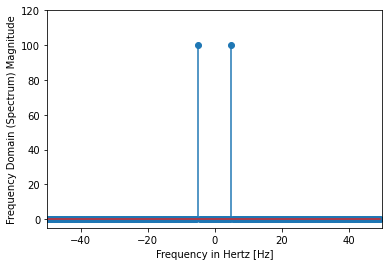

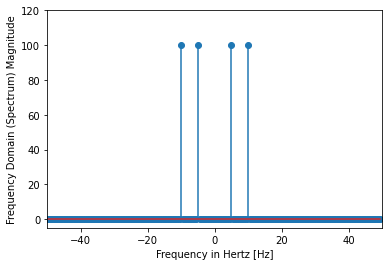

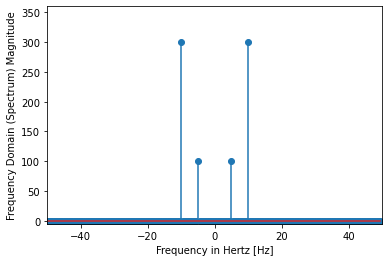

In [16]:
from scipy import fftpack

X = fftpack.fft(x)

X2 = fftpack.fft(x2)

X3 = fftpack.fft(x3)

freqs = fftpack.fftfreq(len(x)) * f_s

freqs2 = fftpack.fftfreq(len(x2)) * f_s

freqs3 = fftpack.fftfreq(len(x3)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 120)

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(X2))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 120)

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(X3))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 360)

In [18]:
#fft constant signal
from scipy import fftpack
N = 5
fftpack.fft(np.ones(N))  # The first component is np.mean(x) * N

array([5.-0.j, 0.+0.j, 0.+0.j, 0.-0.j, 0.-0.j])

In [26]:
#fft non-constant signal
z=np.array([1,-1,1,-1,1,-1,1,-1,1,-1])
print(fftpack.fft(z))

#non-constant signal plus dc signal
zz=np.array([1,1,1,1,1,1,1,1,1,1])
print(fftpack.fft(z+(4*zz)))
print(fftpack.fftfreq(10))

[ 0.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j 10.-0.j  0.-0.j  0.-0.j  0.-0.j
  0.-0.j]
[40.-0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j 10.-0.j  0.-0.j  0.-0.j  0.-0.j
  0.-0.j]
[ 0.   0.1  0.2  0.3  0.4 -0.5 -0.4 -0.3 -0.2 -0.1]


Text(0.5, 1.0, 'Denoised image')

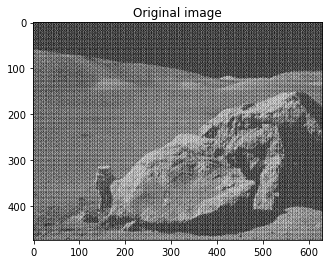

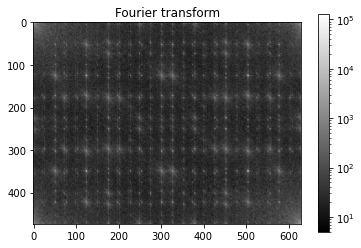

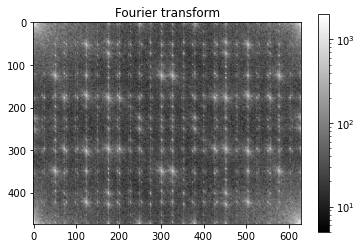

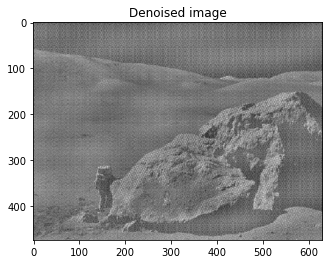

In [65]:

image = plt.imread('/users/ljk/Desktop/moonlanding.png').astype(float)

plt.figure()
plt.imshow(image, plt.cm.gray)
plt.title('Original image')

F=fftpack.fft2(image)

def plot_spectrum(F):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(F), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(F)
plt.title('Fourier transform')

F_dim=F.copy()
F_mag=np.abs(F)
peaks = F_mag < np.percentile(F_mag, 99.95)
F_dim=F_dim*peaks.astype(int)

image_filtered = np.real(fftpack.ifft2(F_dim))

#F_mag=fftpack.fftshift(F_mag)


def plot_spectrum(F_dim):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(F_dim), norm=LogNorm(vmin=5))
    plt.colorbar()
plt.figure()
plot_spectrum(F_dim)
plt.title('Fourier transform')

plt.figure()
plt.imshow(image_filtered, plt.cm.gray)
plt.title('Denoised image')



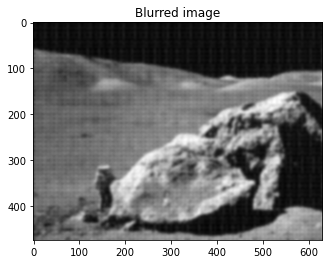

In [68]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(image, 3)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()

One of the most important rules of sampling is called the Nyquist Theorem: the highest frequency which can be represented accurately is one half of the sampling rate. 

The Nyquist rate specifies the minimum sampling rate that fully describes a given signal; in other words a sampling rate that enables the signal's accurate reconstruction. 

In practice, the sampling rate required to reconstruct the original signal must be somewhat higher than the Nyquist rate.

As an example, humans can detect or hear frequenies in the range of 20 Hz to 20,000 Hz. If we were to store music to a CD, the audio signal must be sampled at a rate of at least 40,000 Hz to reproduce the 20,000 Hz signal. A standard CD is sampled at 44,100 times per second, or 44.1 kHz.

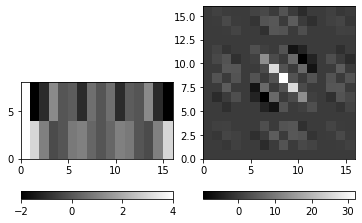

In [10]:
import numpy

from scipy.fftpack import fft,fft2, fftshift

import matplotlib.pyplot as plt

B=numpy.ones((4,4)); W=numpy.zeros((4,4))

signal = numpy.bmat("B,W;W,B")

onedimfft = fft(signal,n=16)

twodimfft = fft2(signal,shape=(16,16))

plt.figure()

plt.gray()

plt.subplot(121,aspect='equal')

plt.pcolormesh(onedimfft.real)

plt.colorbar(orientation='horizontal')

plt.subplot(122,aspect='equal')

plt.pcolormesh(fftshift(twodimfft.real))

plt.colorbar(orientation='horizontal')

plt.show()

In [10]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 10  # Seconds
N=SAMPLE_RATE*DURATION
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
#x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
#plt.plot(x, y)
#plt.show()


In [11]:
_, nice_tone = generate_sine_wave(2000, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(9000, SAMPLE_RATE, DURATION)
_, nice_tone2 = generate_sine_wave(900, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3
nice_tone2 = nice_tone2*0.8
mixed_tone = nice_tone + noise_tone + nice_tone2

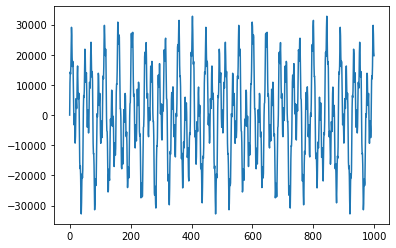

In [12]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [13]:
from scipy.io.wavfile import write
from scipy.io.wavfile import read
# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("signal2.wav", SAMPLE_RATE, normalized_tone)

In [8]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(sig_in)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

NameError: name 'sig_in' is not defined

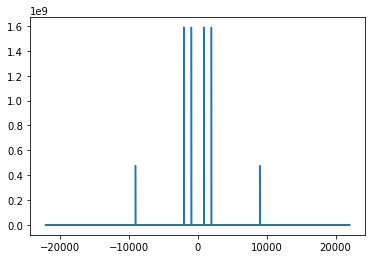

In [103]:
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)
plt.plot(xf, np.abs(yf))
plt.show()

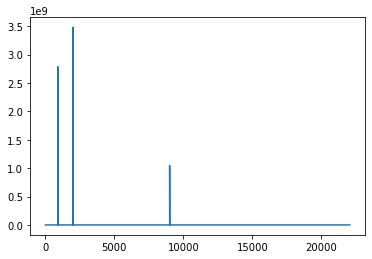

In [14]:
from scipy.fft import rfft, rfftfreq

# Note the extra 'r' at the front
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

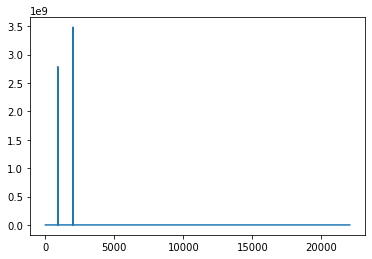

In [15]:
# The maximum frequency is half the sample rate
points_per_freq = len(xf) / (SAMPLE_RATE / 2)

# Our target frequency is 4000 Hz
target_idx = int(points_per_freq * 9000)
yf[target_idx - 2 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

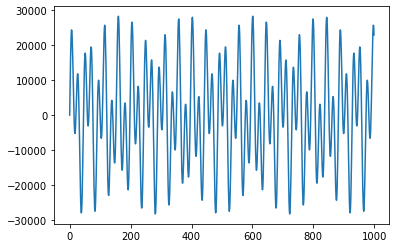

In [16]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()

In [47]:
sample_rate,sig_in=read("signal2.wav")

In [54]:
length = sig_in.shape[0] / sample_rate

In [55]:
print(f"length = {length}s")

length = 10.0s


In [56]:
time = np.linspace(0., length, sig_in.shape[0])

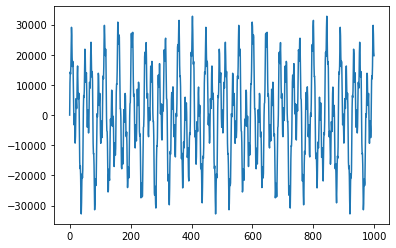

In [57]:
plt.plot(sig_in[:1000])

44100 10.0 441000


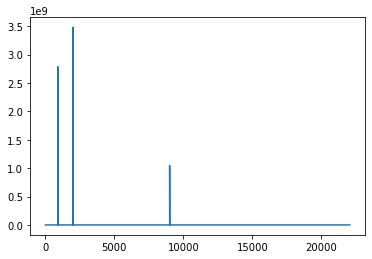

In [58]:
N = int(sample_rate*length)
print(sample_rate, length, N)
yf = rfft(sig_in)
xf = rfftfreq(N, 1 / sample_rate)

plt.plot(xf, np.abs(yf))
plt.show()

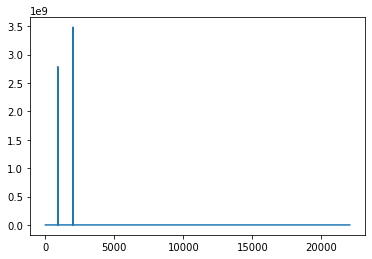

In [59]:
points_per_freq = len(xf) / (sample_rate / 2)

# Our target frequency is 9000 Hz
target_idx = int(points_per_freq * 9000)
yf[target_idx - 2 : target_idx + 2] = 0

plt.plot(xf, np.abs(yf))
plt.show()

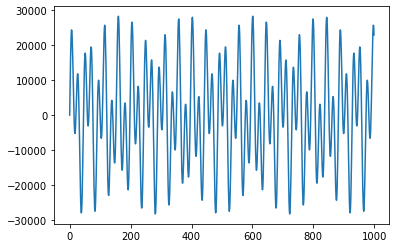

In [60]:
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])
plt.show()